In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from typing import List, Dict
from src.utils.graphs import saveModelLosses

In [5]:
def getMetricsByDatasetResolution(path: str, models: List[str], group_epoch: bool = False, metric_type: str = 'validation') -> List[Dict]:
    result = []
    for model in models:
        df = pd.read_csv(f'{path}/{model}/{metric_type}_metrics.csv', sep=';')
        if group_epoch:
            df = df.groupby('epoch').mean()
        df['model'] = model
        result += json.loads(df.to_json(orient='records'))
    return result


In [34]:
pecan_hour_models = ['GRU', 'LSTM', 'RNN', 'TST', 'Transformer']
pecan_hour_path = 'etc/log/participants/Pecanstreet/single-step/661/1hour'
pecan_fifteen_path = 'etc/log/participants/Pecanstreet/single-step/661/15min'
validation_pecan_hour_df = getMetricsByDatasetResolution(pecan_hour_path, pecan_hour_models)
training_pecan_hour_df = getMetricsByDatasetResolution(pecan_hour_path, 
                                                       pecan_hour_models, 
                                                       group_epoch=True, 
                                                       metric_type='training')

validation_pecan_fifteen_df = getMetricsByDatasetResolution(pecan_fifteen_path, pecan_hour_models)
training_pecan_fifteen_df = getMetricsByDatasetResolution(pecan_fifteen_path, 
                                                       pecan_hour_models, 
                                                       group_epoch=True, 
                                                       metric_type='training')

FileNotFoundError: [Errno 2] No such file or directory: 'etc/log/participants/Pecanstreet/single-step/661/15min/RNN/validation_metrics.csv'

In [7]:
hue_hour_models = ['FCN', 'GRU', 'LSTM', 'RNN', 'TST']
hue_hour_path = 'etc/log/participants/HUE/single-step/1/1hour'
validation_hue_hour_df = getMetricsByDatasetResolution(hue_hour_path, hue_hour_models)
training_hue_hour_df = getMetricsByDatasetResolution(hue_hour_path, 
                                                     hue_hour_models,
                                                    group_epoch=True,
                                                    metric_type='training')

In [8]:
validation_pecan_hour_df = pd.DataFrame(validation_pecan_hour_df)
validation_hue_hour_df = pd.DataFrame(validation_hue_hour_df)

training_pecan_hour_df = pd.DataFrame(training_pecan_hour_df)
training_hue_hour_df = pd.DataFrame(training_hue_hour_df)

metrics_hue_hour_df = validation_hue_hour_df.copy()
metrics_hue_hour_df['train|MSE'] = training_hue_hour_df['train|MSE']

metrics_pecan_hour_df = validation_pecan_hour_df.copy()
metrics_pecan_hour_df['train|MSE'] = training_pecan_hour_df['train|MSE']



In [9]:
list(metrics_pecan_hour_df.model.unique())

['GRU', 'LSTM', 'RNN', 'TST', 'Transformer']

In [10]:
def saveValTrainLossesByModel(dataset: pd.DataFrame, dataset_name:str, path:str, resolution: str, filename:str, val_metric_name: str):
    models = list(dataset.model.unique())
    allModelLosses = []
    for model in models:
        modelloss = []
        valloss = dataset.loc[dataset.model == model, f'val|{val_metric_name}'].values
        modelloss.append(('Validation', '-.', valloss))
        allModelLosses.append((model, '-', valloss))
        trainloss = dataset.loc[dataset.model == model, f'train|{val_metric_name}'].values
        modelloss.append(('Training', '-', trainloss))
        saveModelLosses(model_name=model, 
                losses=modelloss, 
                title=f'Comparison of {dataset_name}-{resolution} losses', 
                path=f'{path}/{model}',
                filename=f'{filename}_{model}'
               )
        plt.show()
    return allModelLosses

In [24]:
dataset = {
    'HUE': metrics_hue_hour_df,
    'Pecan Street': metrics_pecan_hour_df
}


['FCN', 'GRU', 'LSTM', 'RNN', 'TST', 'Transformer']

In [31]:
def saveValTrainModelLossByDataset(datasets: Dict[str, pd.DataFrame], metric_name: str, path: str, filename: str):
    models = []
    for setname in dataset.keys():
        models += list(dataset[setname].model.unique())
    models = list(dict.fromkeys(models))

    for model in models:
        modelloss = []
        onlyloss = []
        for setname in datasets.keys():
            valloss = datasets[setname].loc[datasets[setname].model == model, f'val|{metric_name}'].values
            modelloss.append((f'{setname} Validation', '-.' ,valloss))
            onlyloss.append((f'{setname} Validation', '-' ,valloss))
            trainloss = datasets[setname].loc[datasets[setname].model == model, f'train|{metric_name}'].values
            modelloss.append((f'{setname} Training', '-' ,trainloss))
        
            
        saveModelLosses(model_name=model, 
                losses=modelloss, 
                title='Dataset losses comparison', 
                path=path,
                filename=f'{filename}_{model}'
               )
        plt.show()
        saveModelLosses(model_name=model, 
                losses=onlyloss, 
                title='Dataset validation loss comparison', 
                path=path,
                filename=f'{filename}_{model}_validation'
               )
        plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


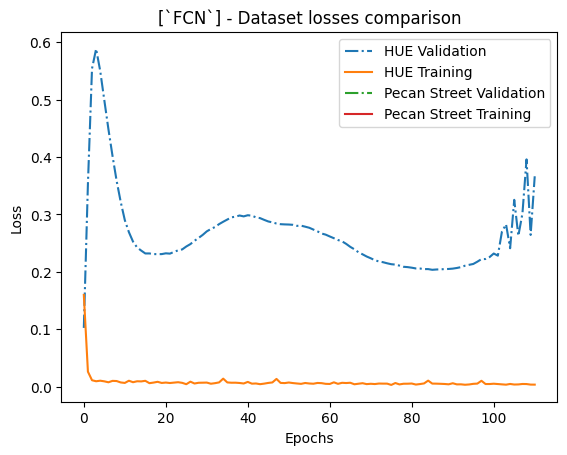

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


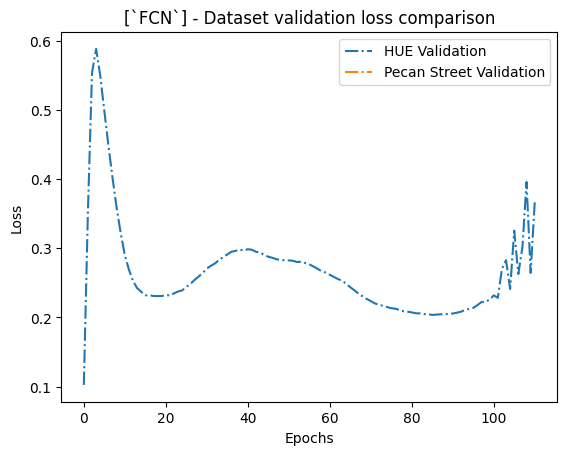

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


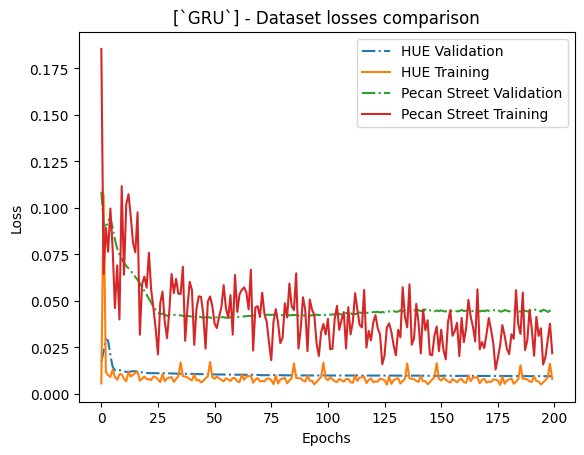

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


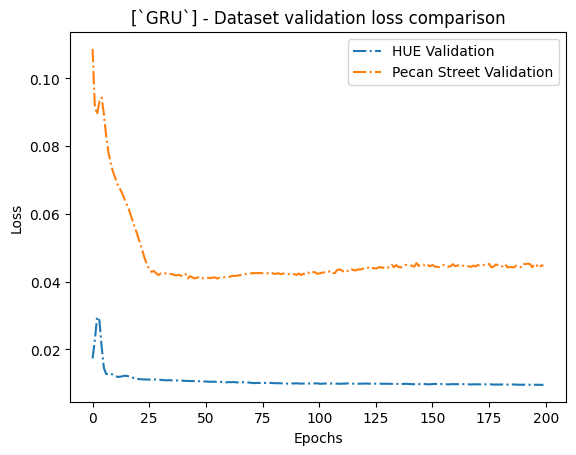

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


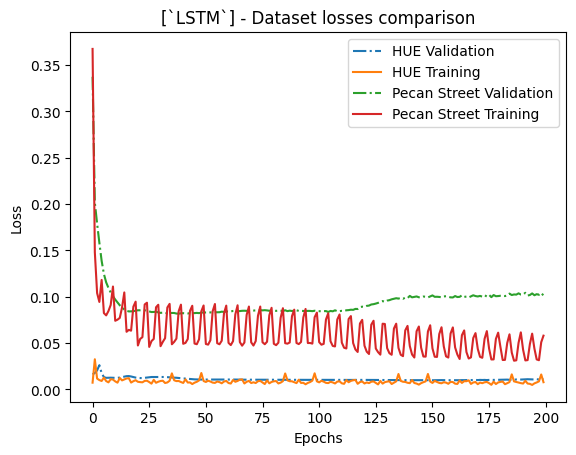

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


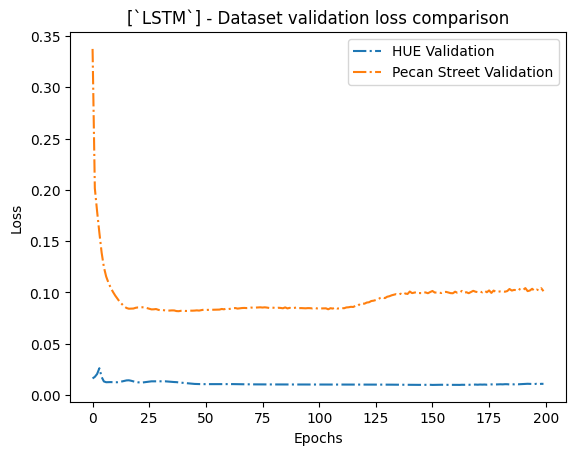

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


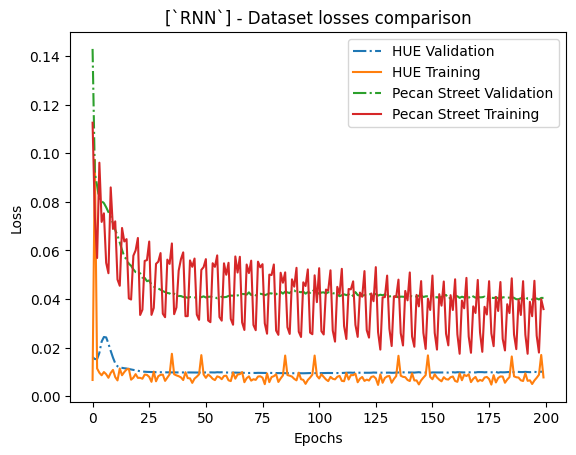

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


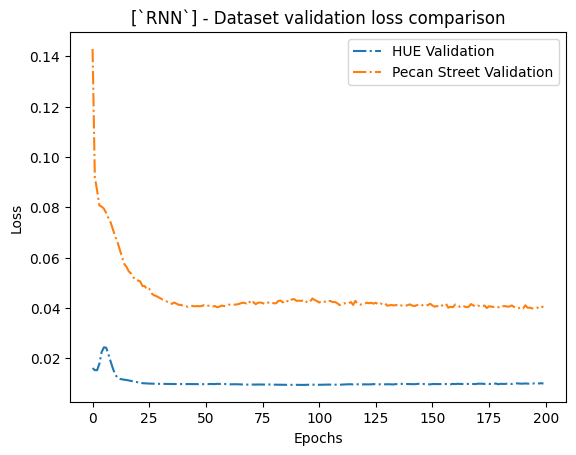

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


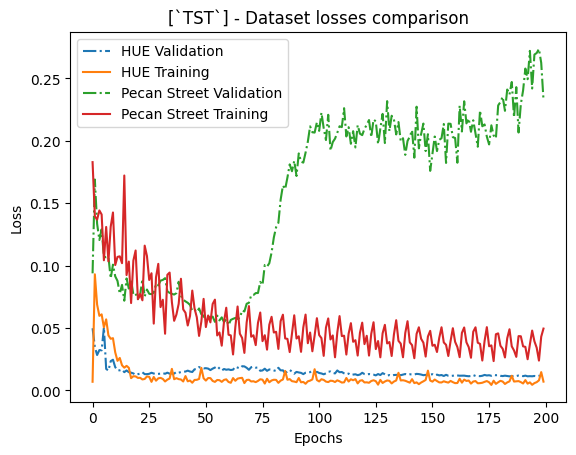

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


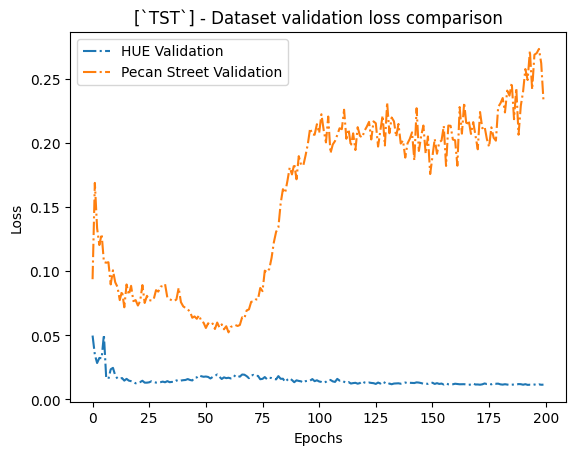

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


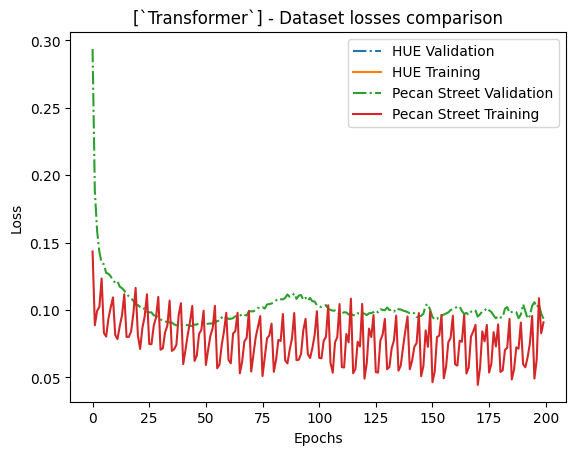

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


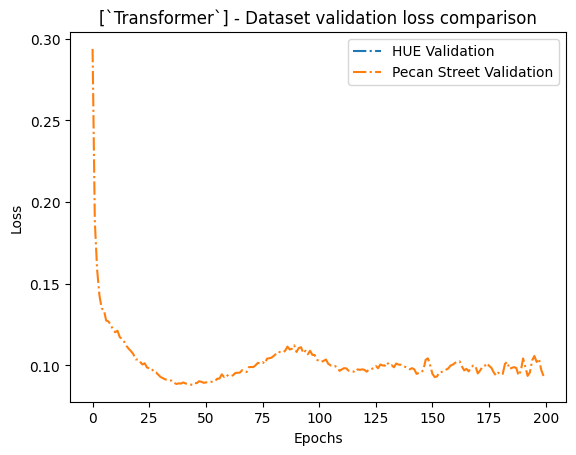

In [32]:
saveValTrainModelLossByDataset(datasets=dataset, metric_name='MSE', path='etc/imgs', filename='dataset_mse_relation')

In [11]:
default_hue_path = 'etc/imgs/HUE/single-step/1/1hour'
default_pecan_path = 'etc/imgs/Pecanstreet/single-step/661/1hour'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


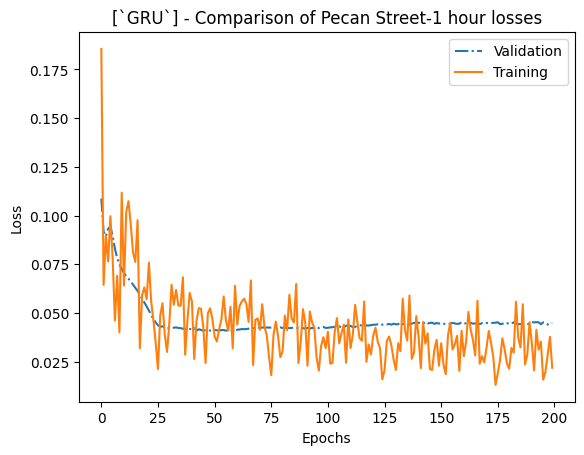

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


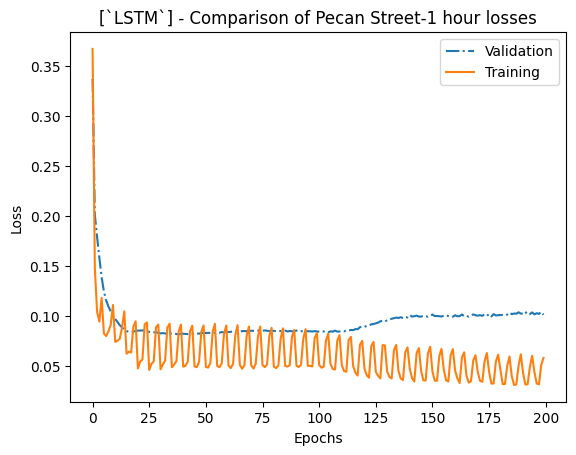

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


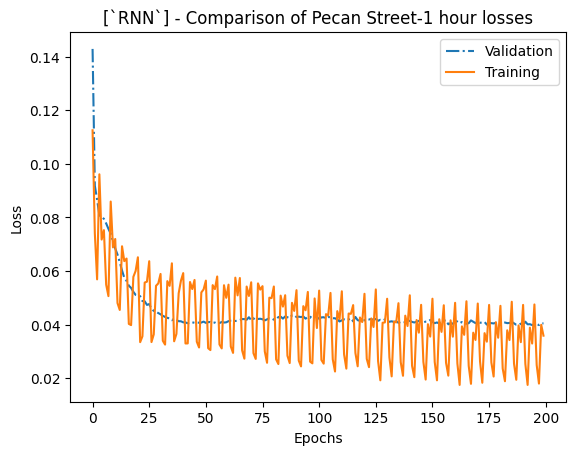

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


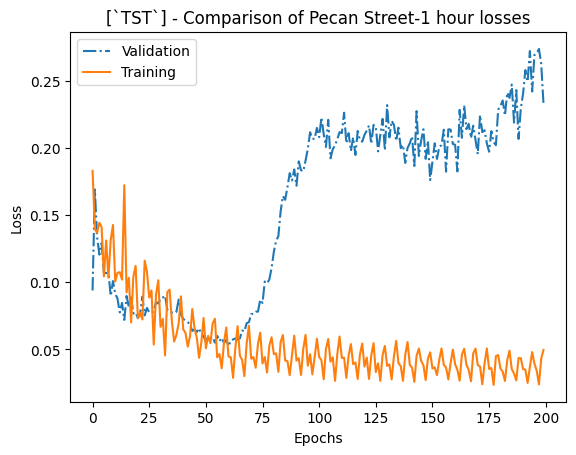

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


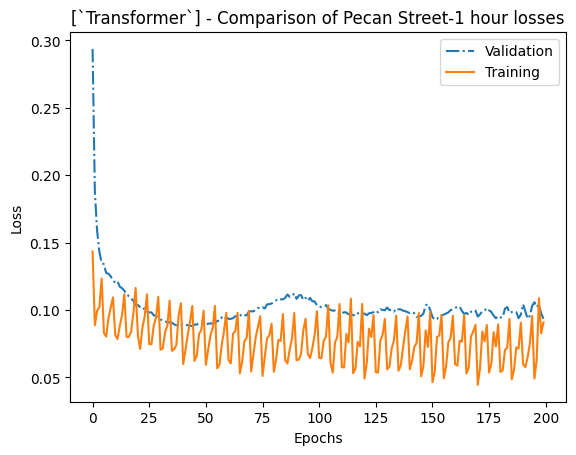

In [13]:
all_pecan_model_losses = saveValTrainLossesByModel(dataset=metrics_pecan_hour_df, 
                                             dataset_name='Pecan Street', 
                                            path=default_pecan_path,
                                             resolution='1 hour',
                                            filename='dataset_mse_relation',
                                            val_metric_name='MSE')



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


'[*] - Losses of Pecan Street Dataset saved on etc/imgs/HUE/single-step/1/1hour/dataset_mse_relation'

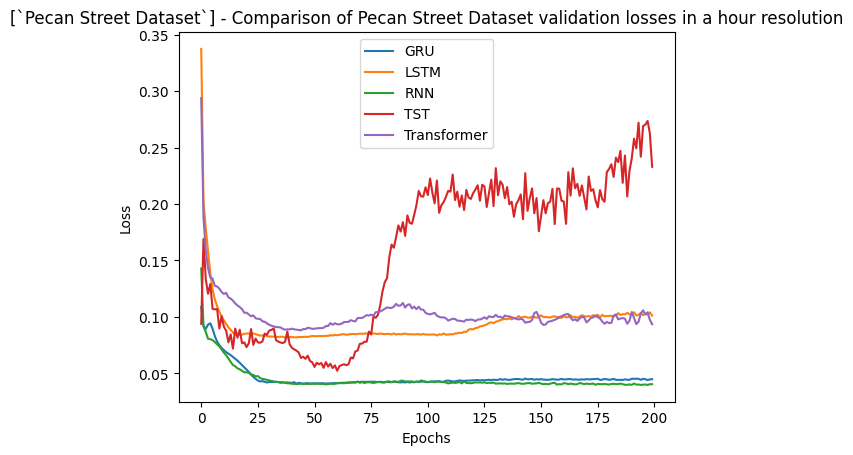

In [14]:
saveModelLosses(model_name='Pecan Street Dataset', 
                losses=all_pecan_model_losses, 
                title='Comparison of Pecan Street Dataset validation losses in a hour resolution', 
                path=default_hue_path,
                filename='dataset_mse_relation'
               )



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


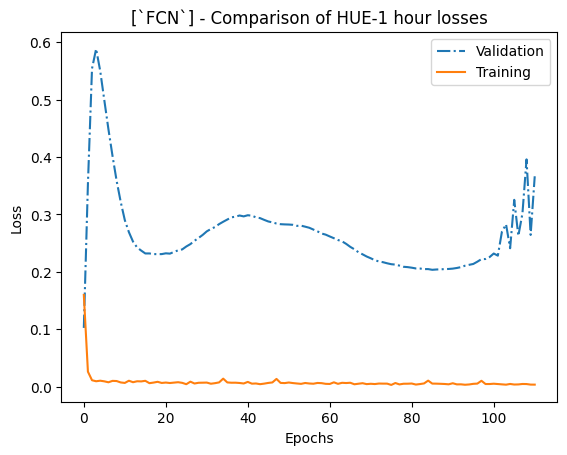

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


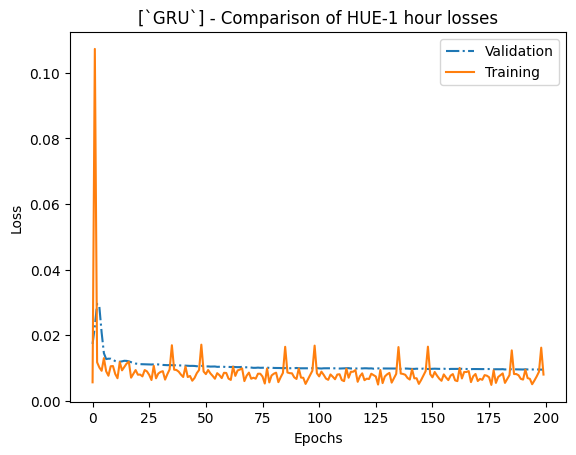

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


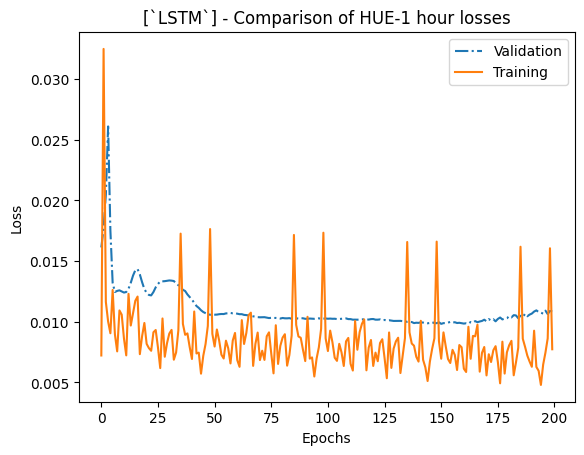

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


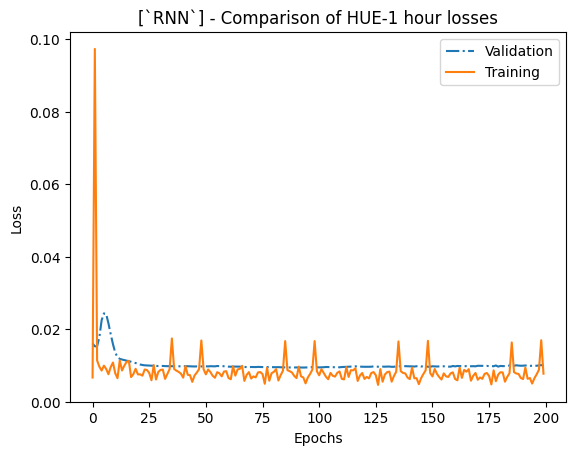

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


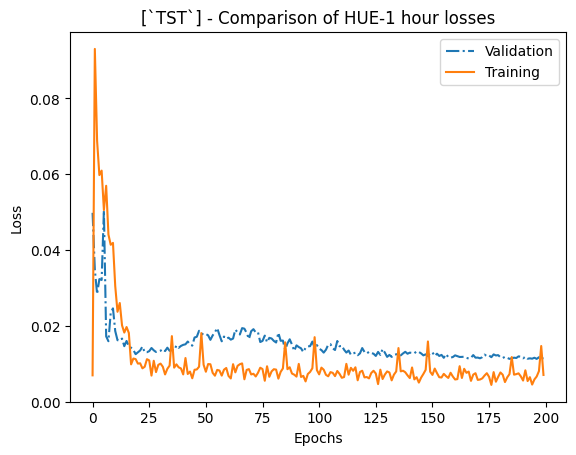

In [15]:
all_model_losses = saveValTrainLossesByModel(dataset=metrics_hue_hour_df, 
                                             dataset_name='HUE', 
                                            path=default_hue_path,
                                             resolution='1 hour',
                                            filename='dataset_mse_relation',
                                            val_metric_name='MSE')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


'[*] - Losses of HUE Dataset saved on etc/imgs/HUE/single-step/1/1hour/dataset_mse_relation'

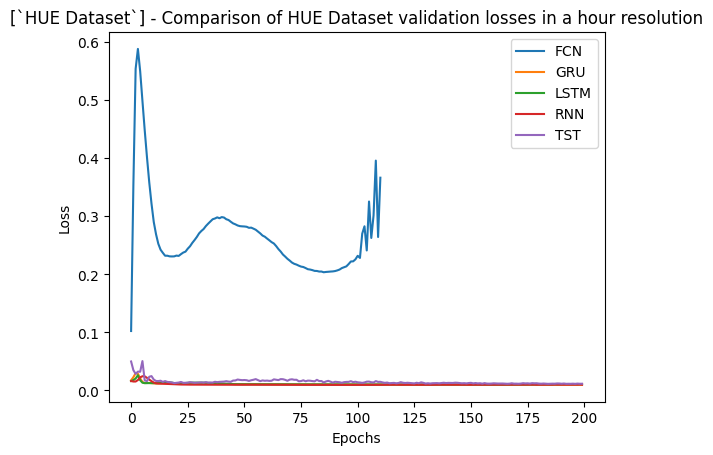

In [16]:
saveModelLosses(model_name='HUE Dataset', 
                losses=all_model_losses, 
                title='Comparison of HUE Dataset validation losses in a hour resolution', 
                path=default_hue_path,
                filename='dataset_mse_relation'
               )

